In [1]:
from trend_examiner import compute_redistribution_trend, compute_scalability_trend
import matplotlib.pyplot as plt
import seaborn as sns

def plot_heatmap(data, title):
    plt.figure(figsize=(7, 3), dpi=300)
    ax = sns.heatmap(data, annot=True, fmt='.1f', cmap="coolwarm", center=0,  annot_kws={"size": 12}, linewidths=0.5)
    for text in ax.texts:
        text.set_text(f"{text.get_text()}%")

    plt.title(title)
    plt.show()

collectives = ['allgather', 'allreduce', 'alltoall', 'bcast', 'gather', 'reduce', 'reduce_scatter', 'scatter', 'allgatherv', 'alltoallv']

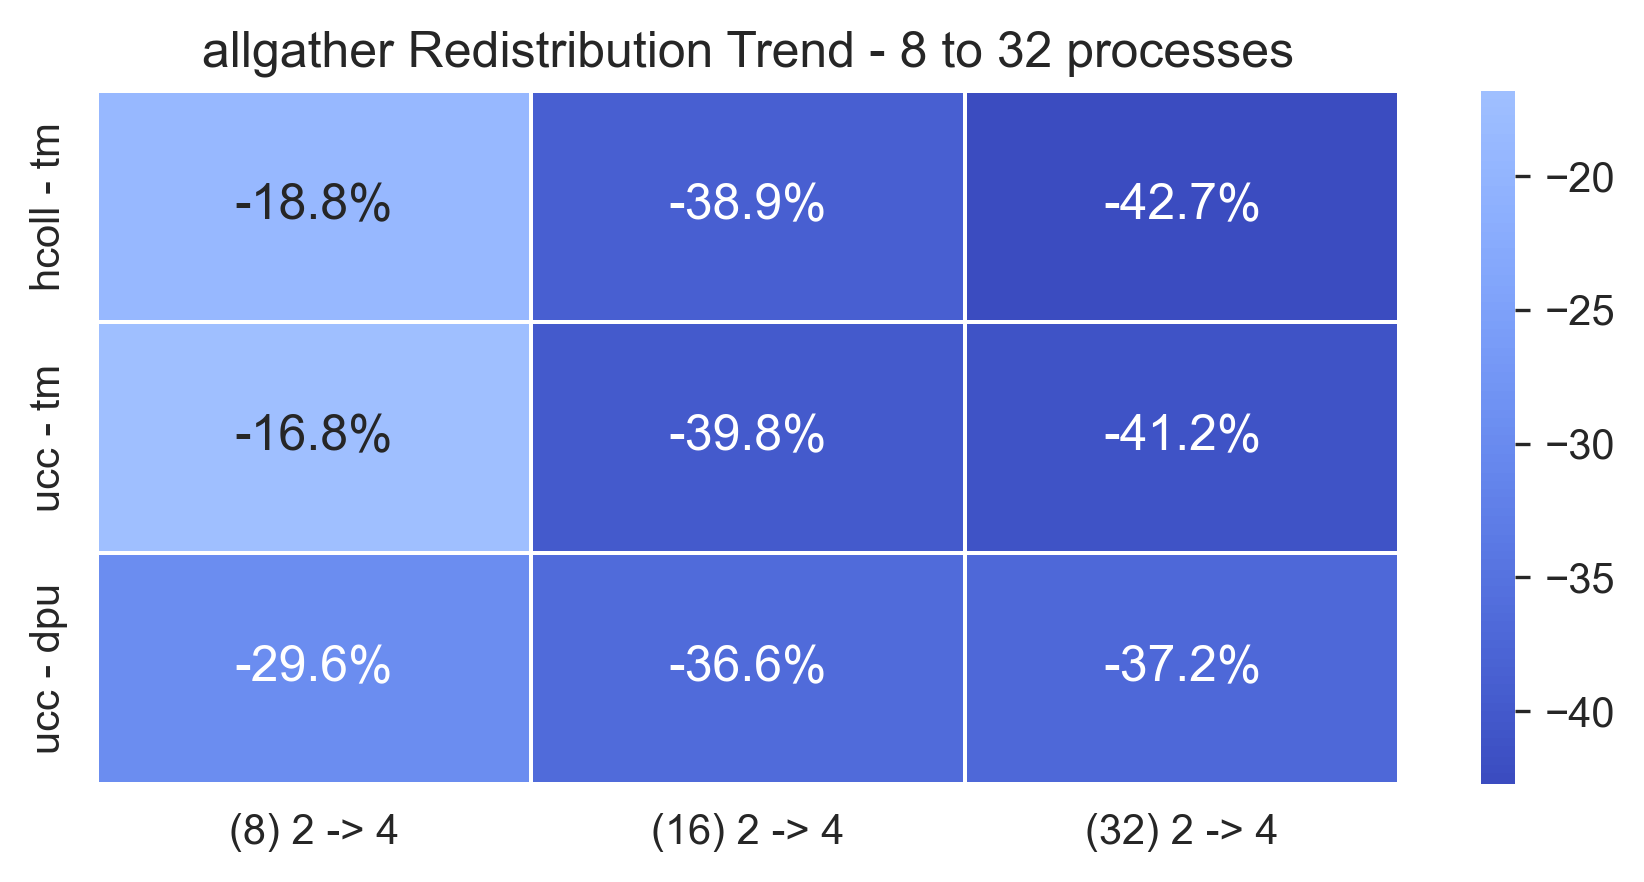

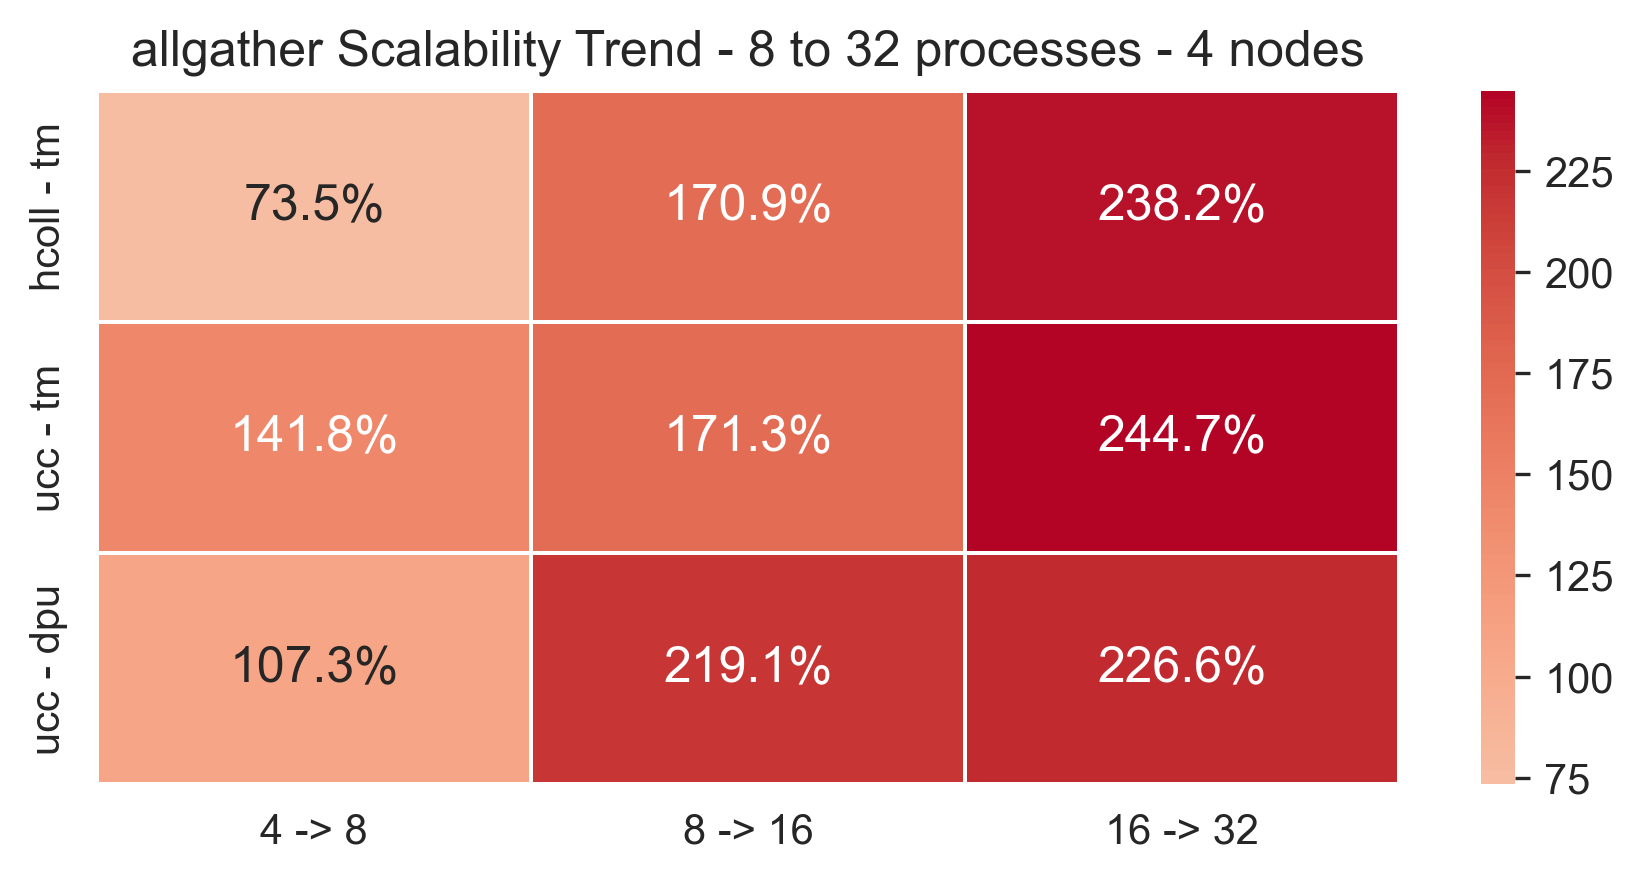

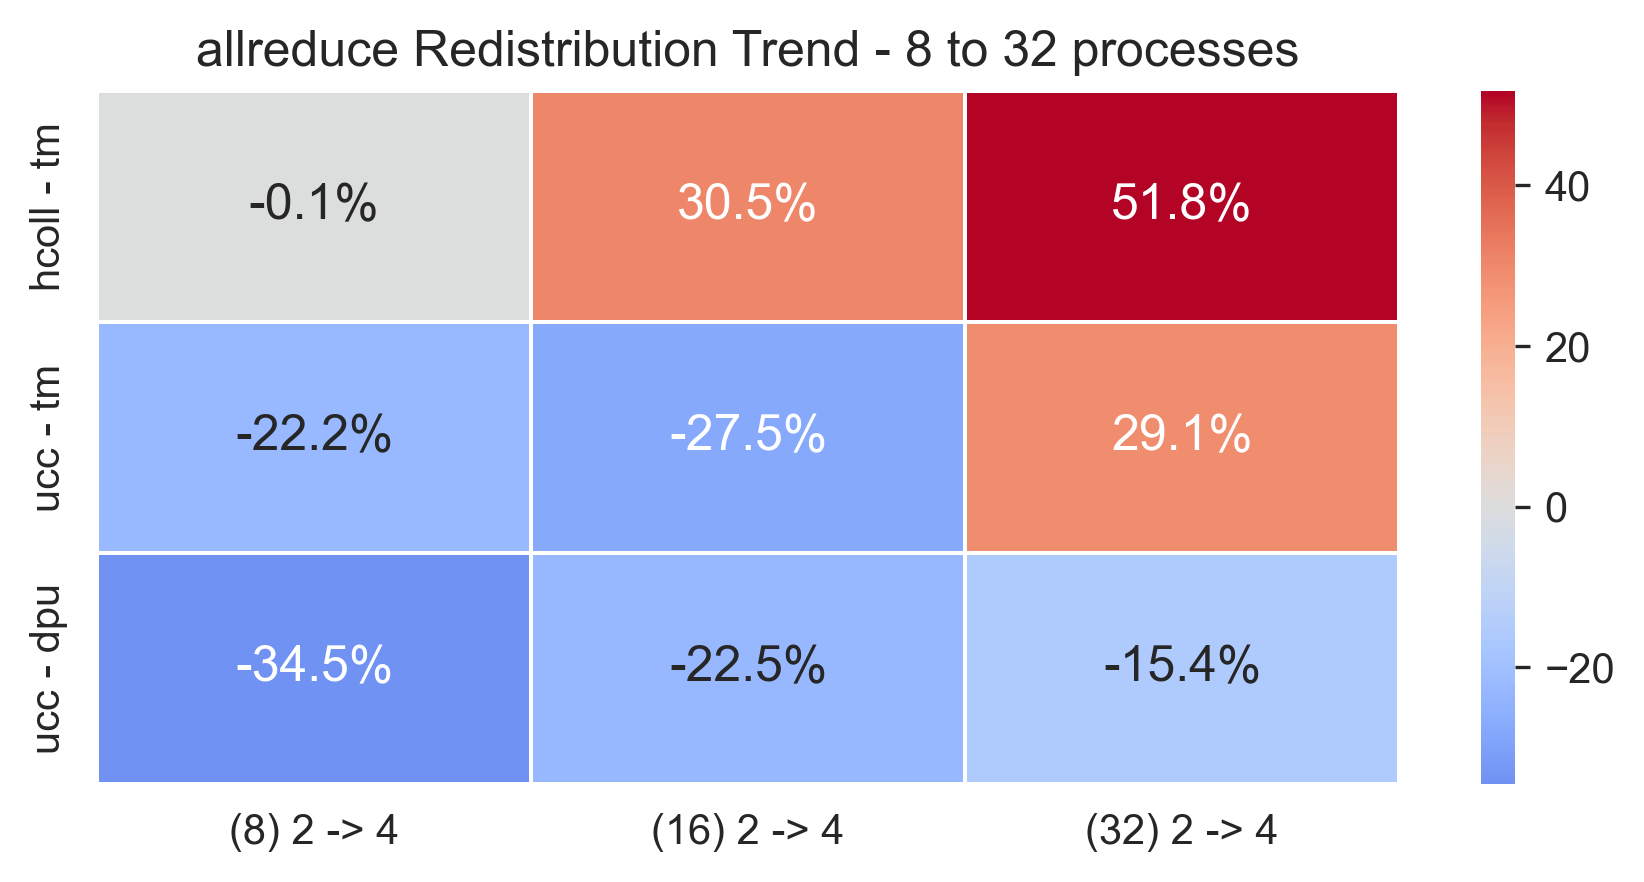

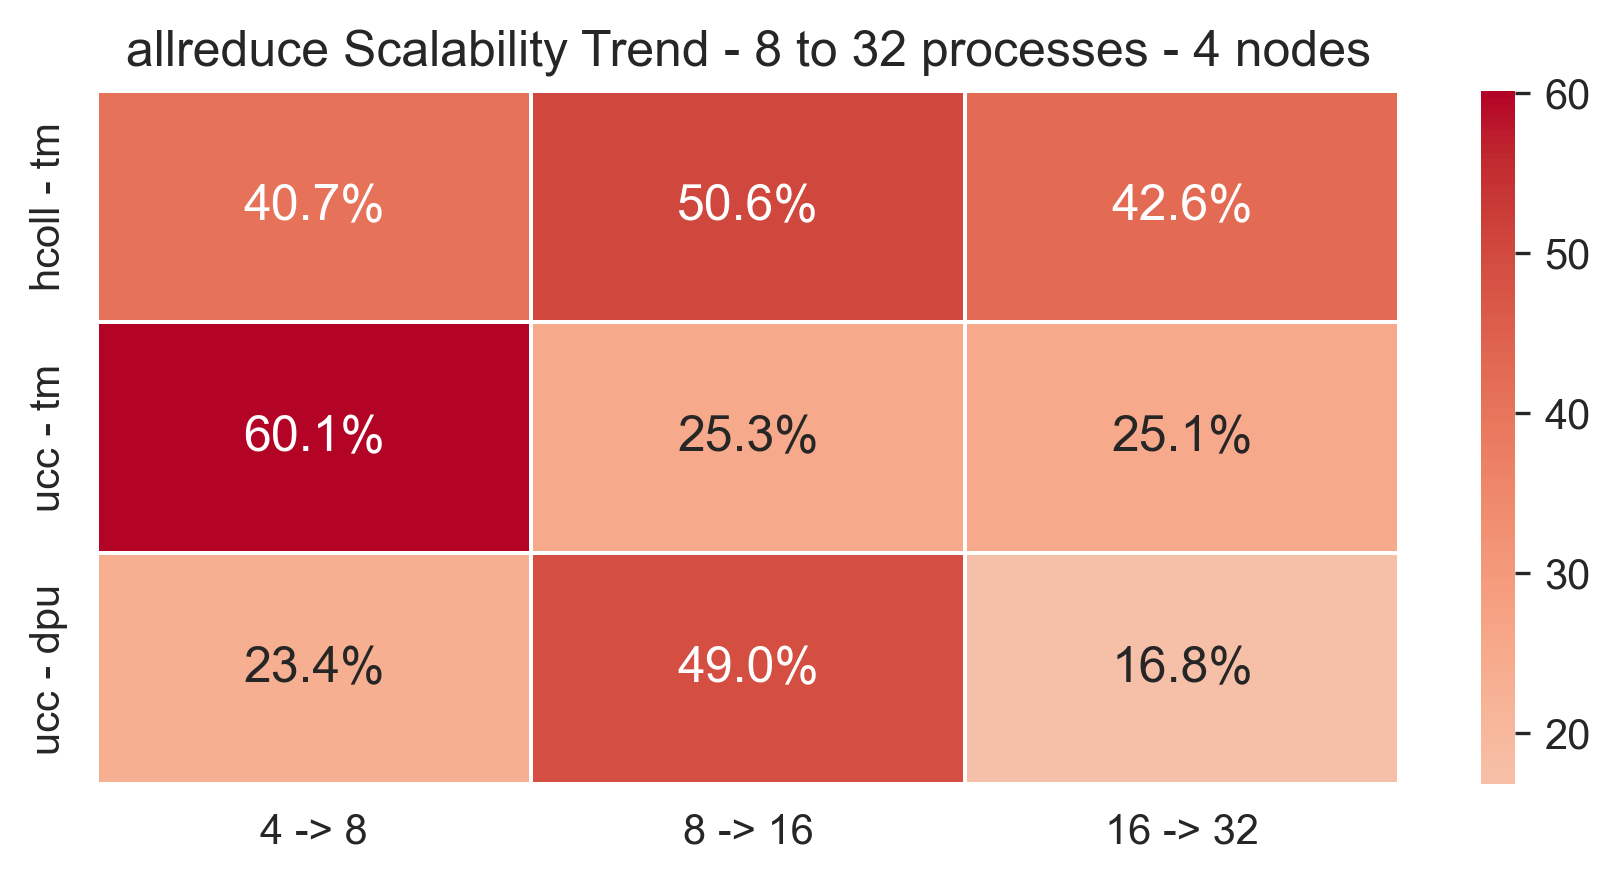

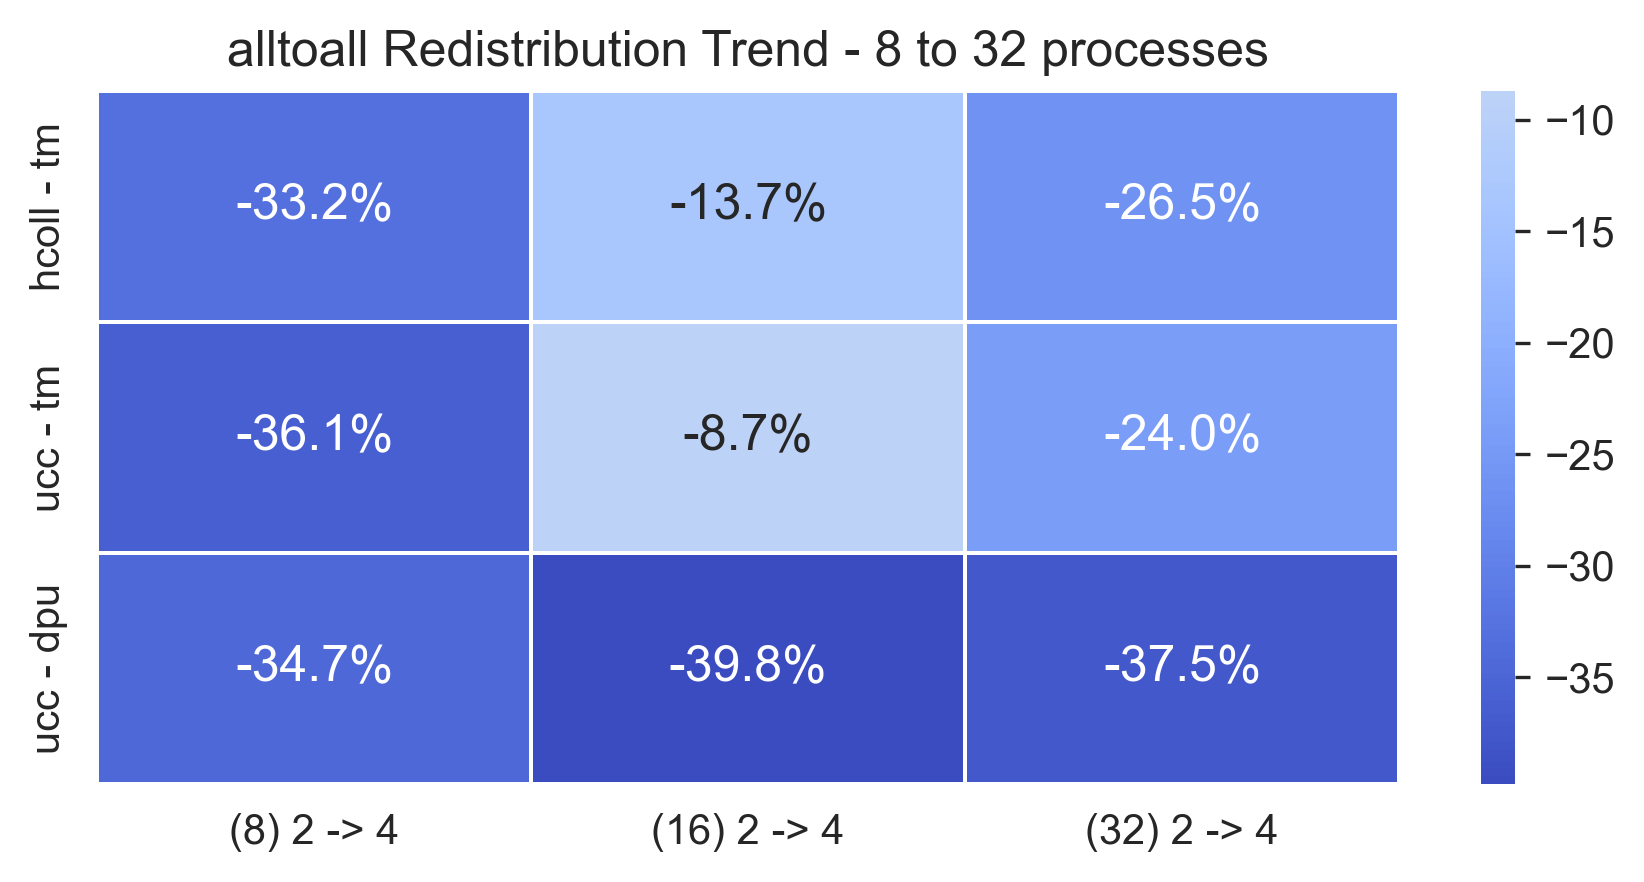

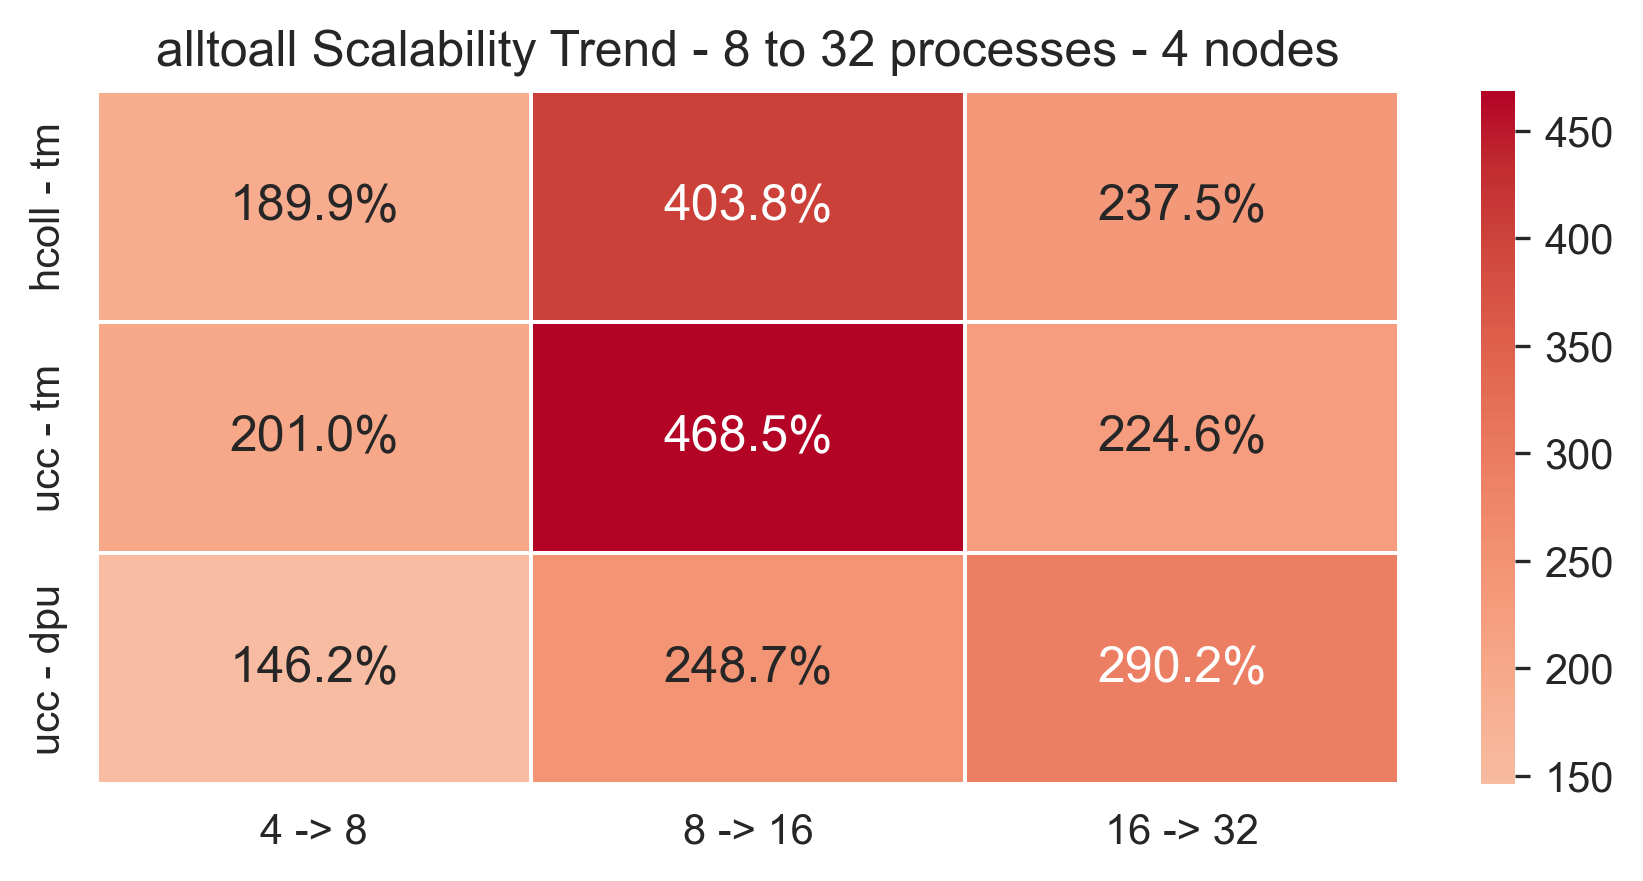

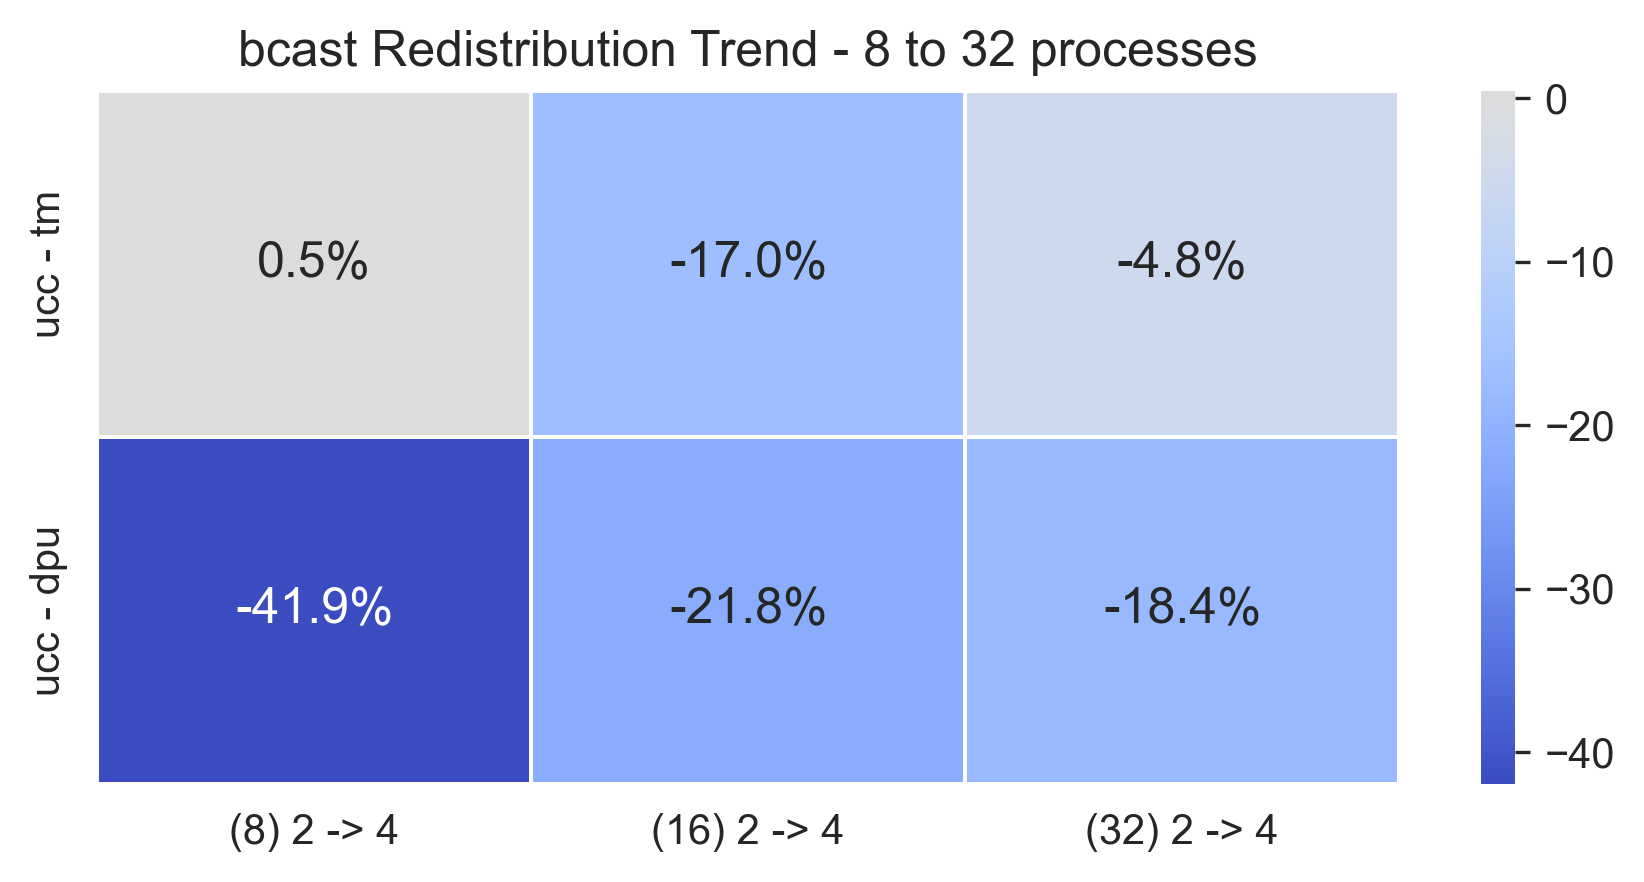

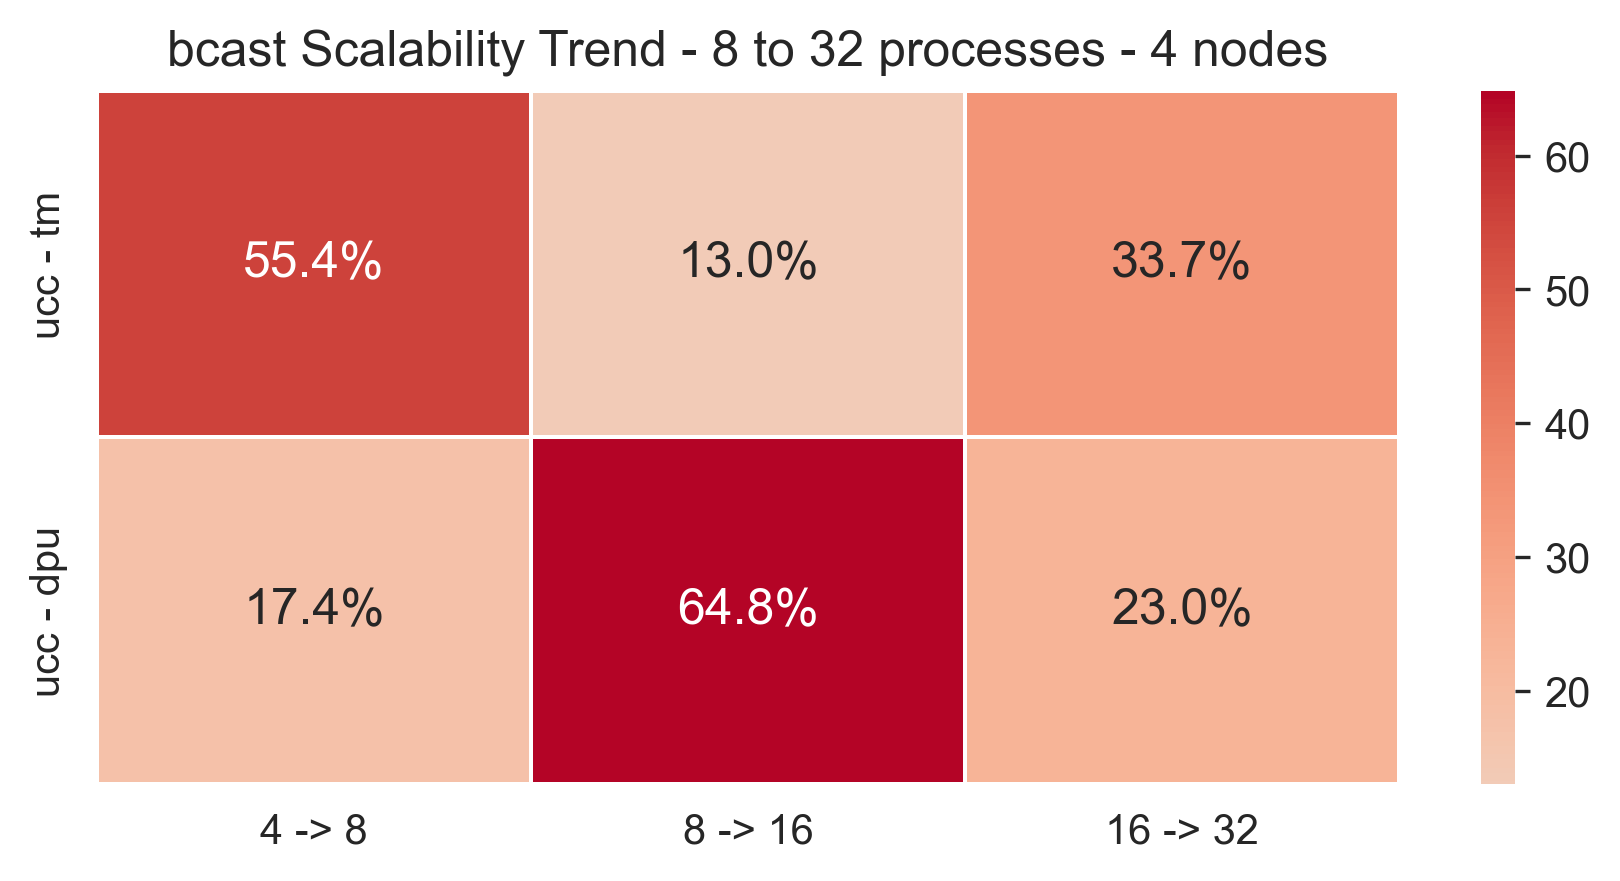

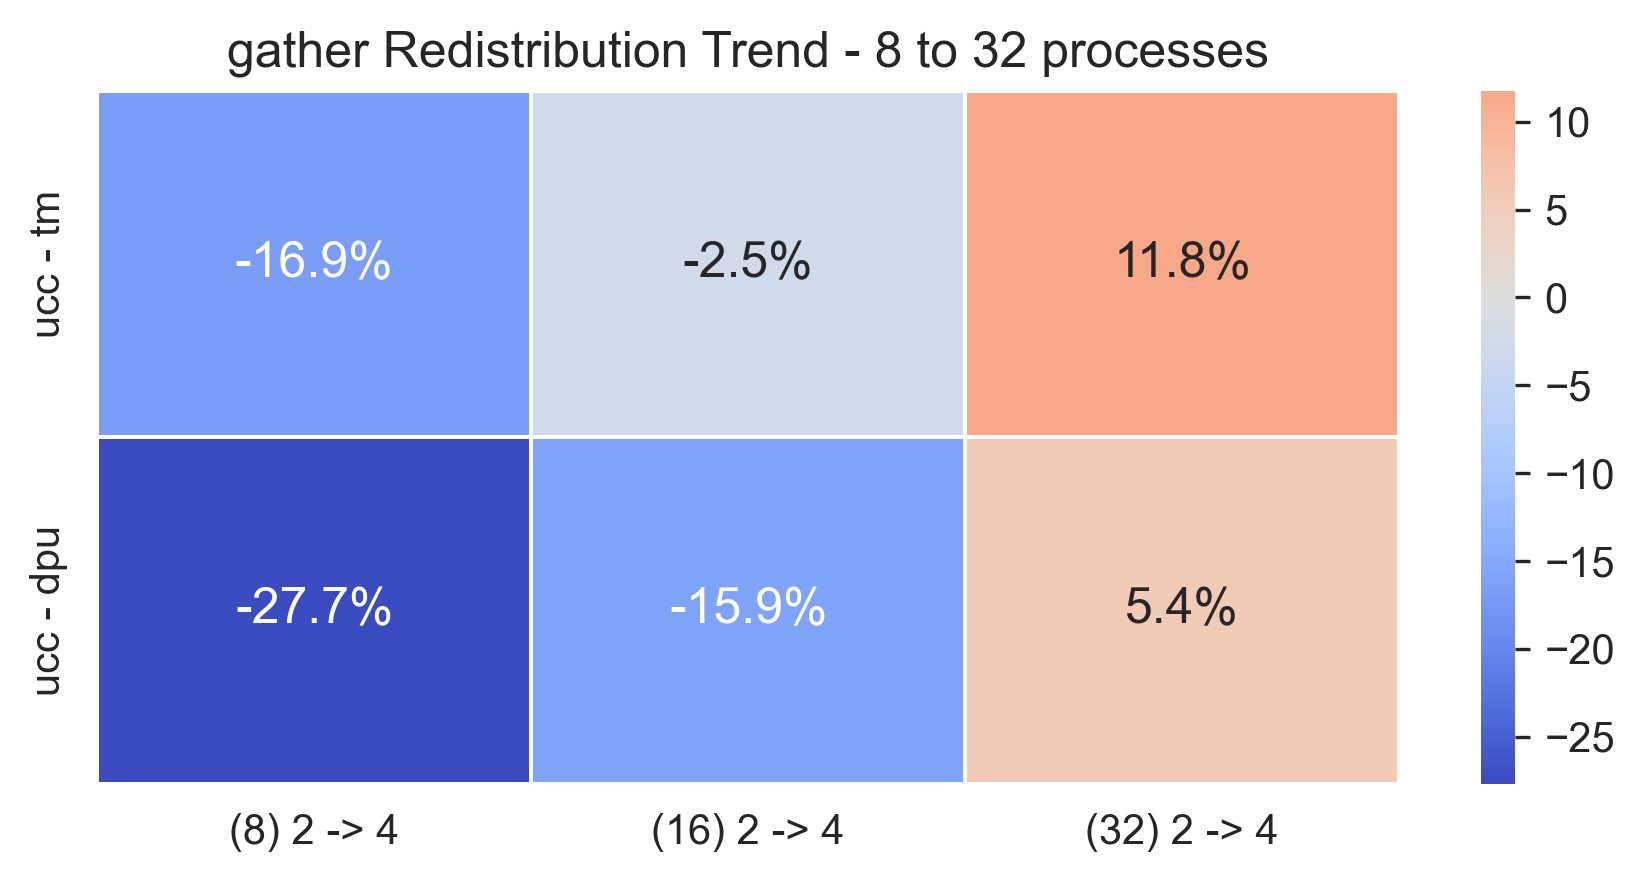

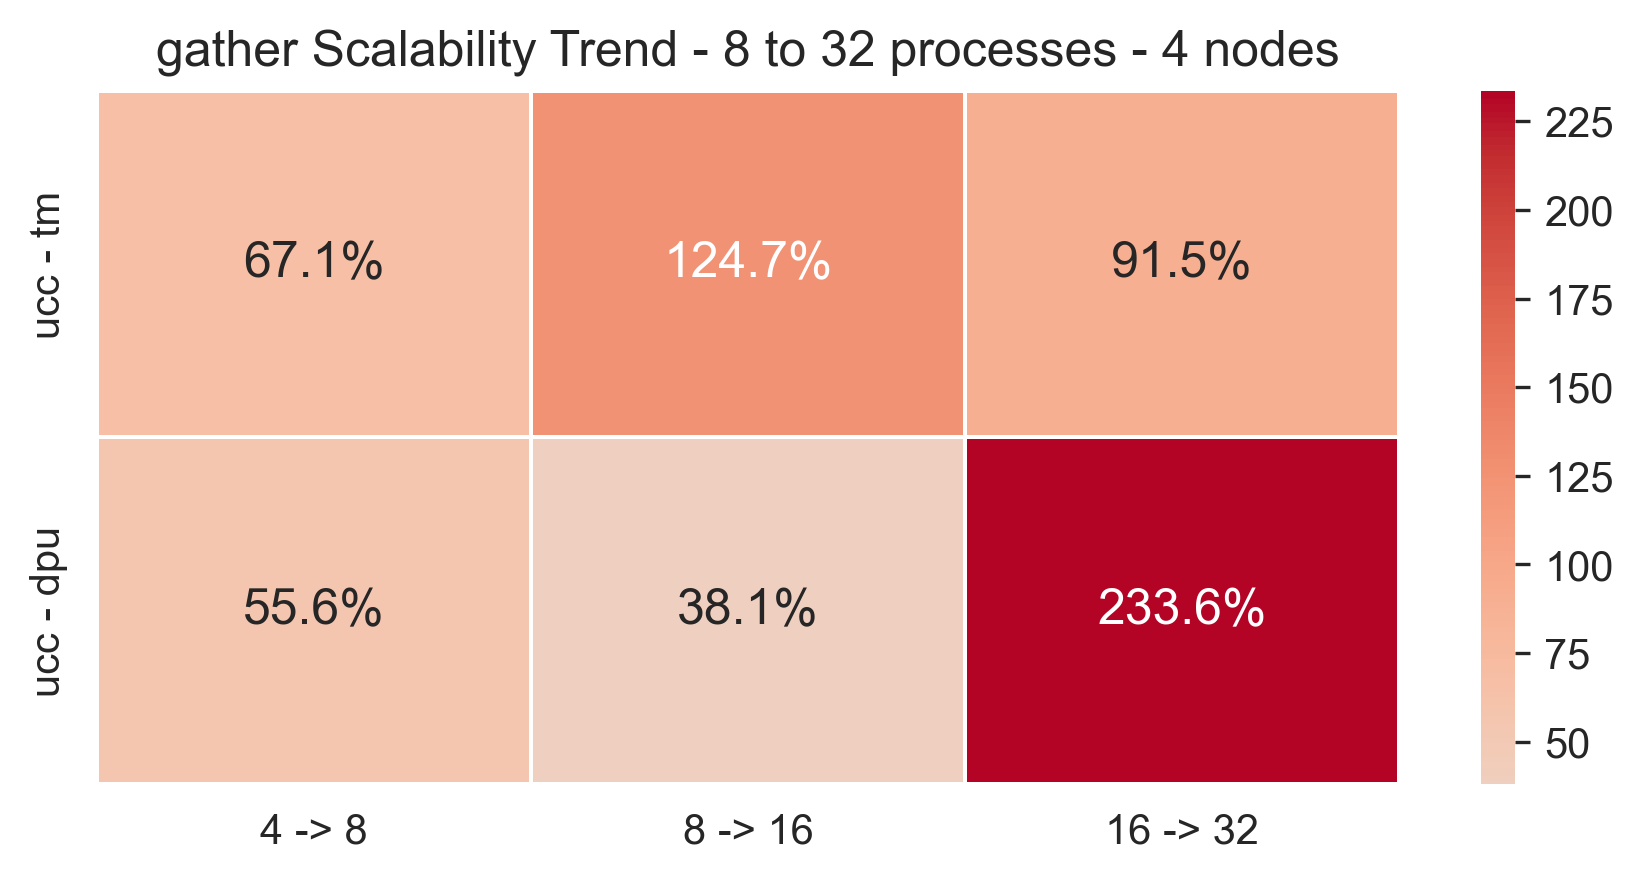

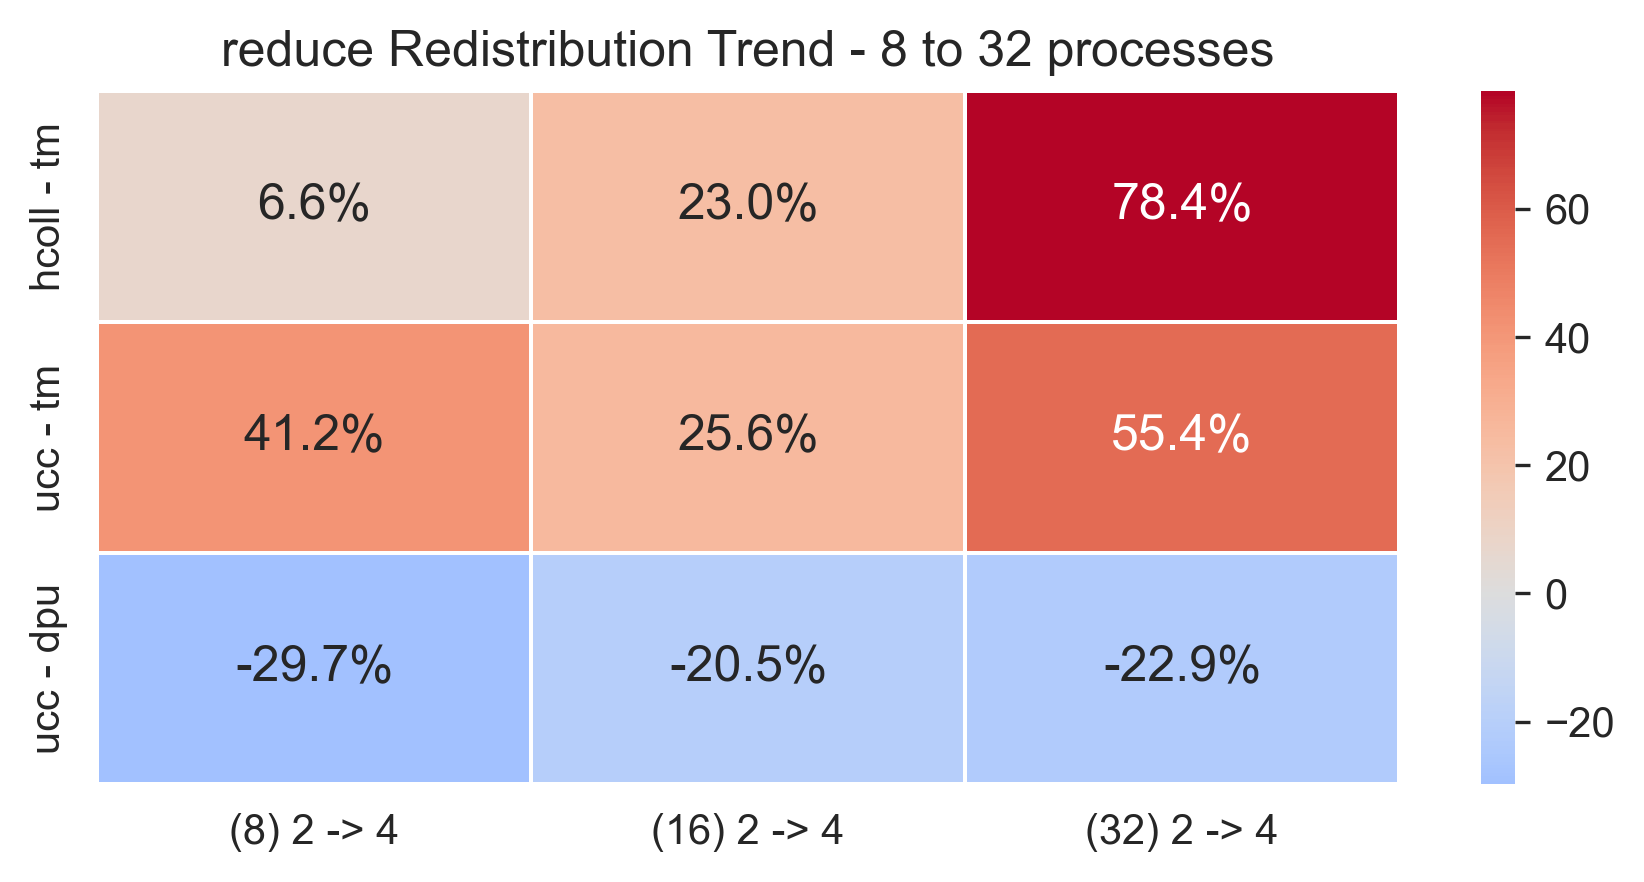

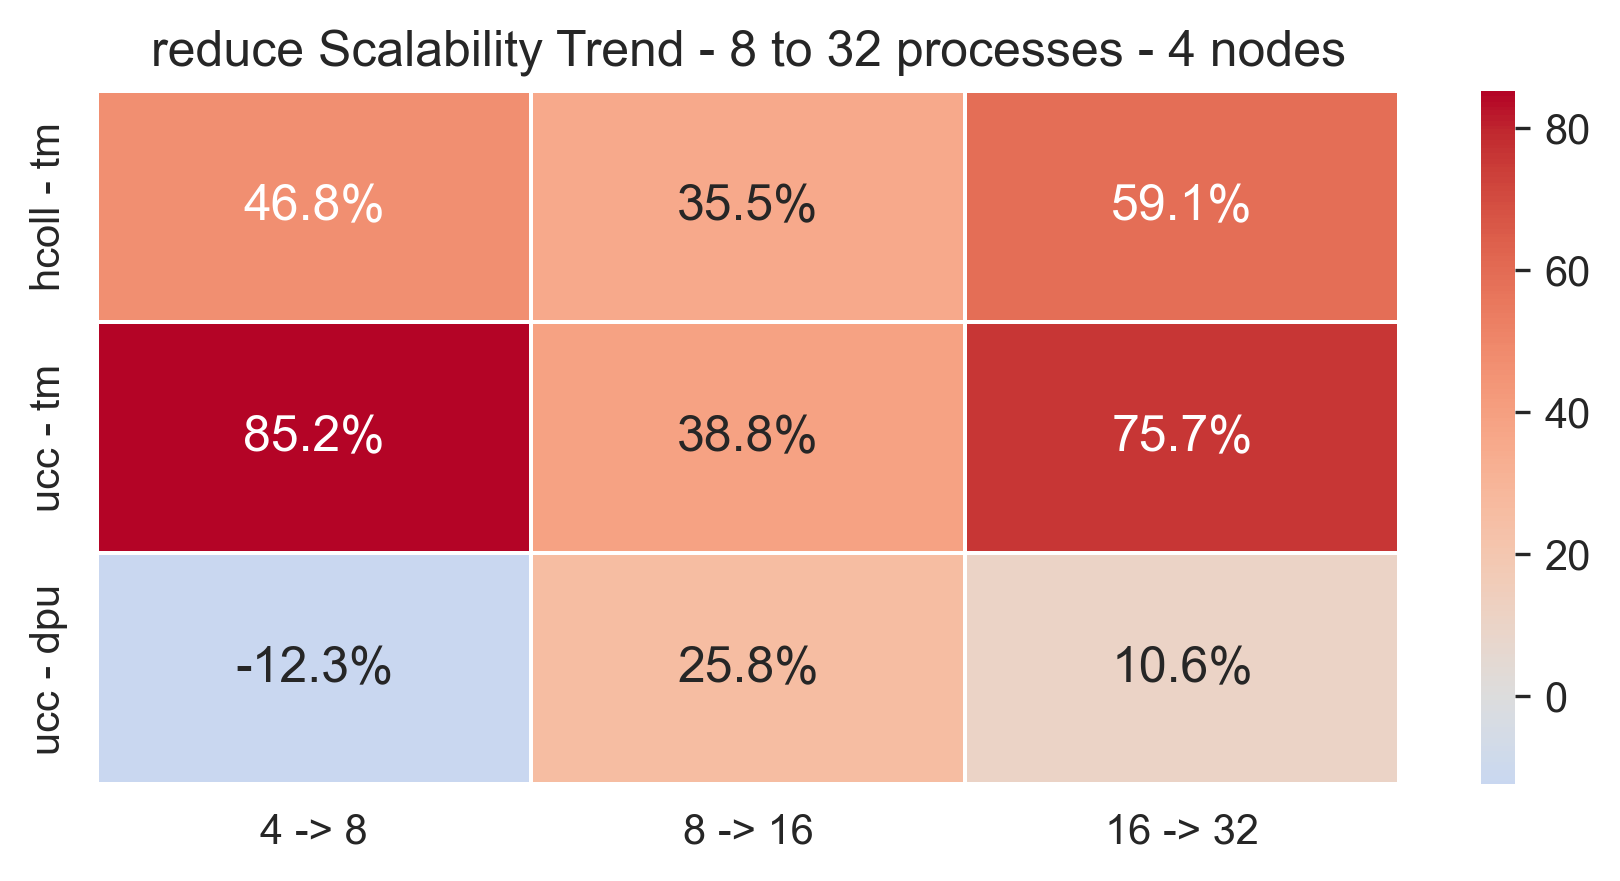

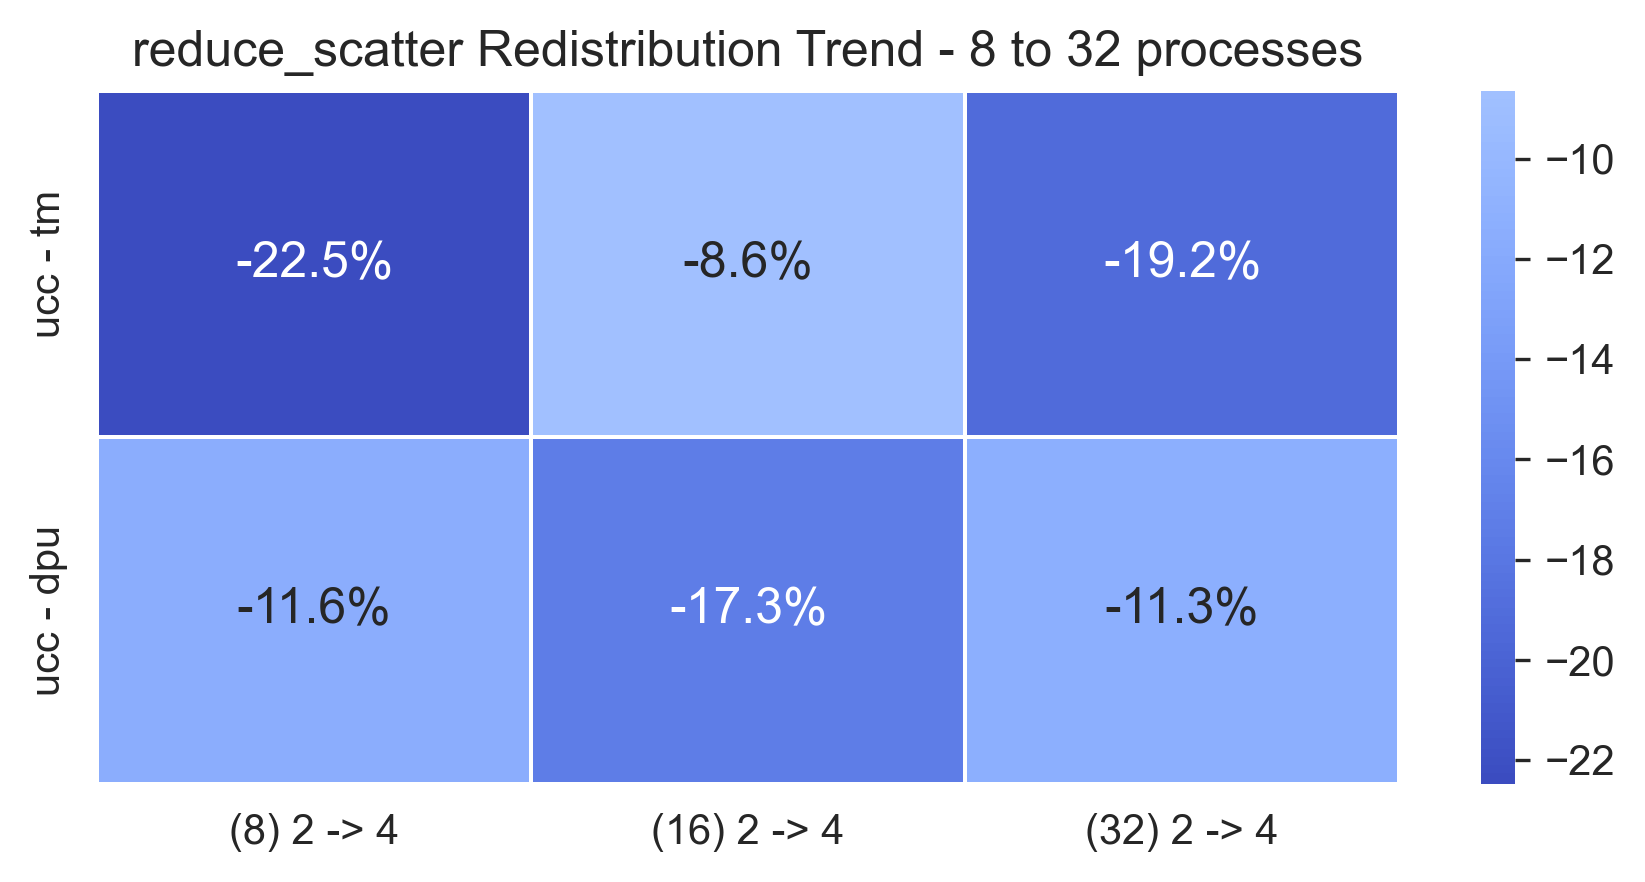

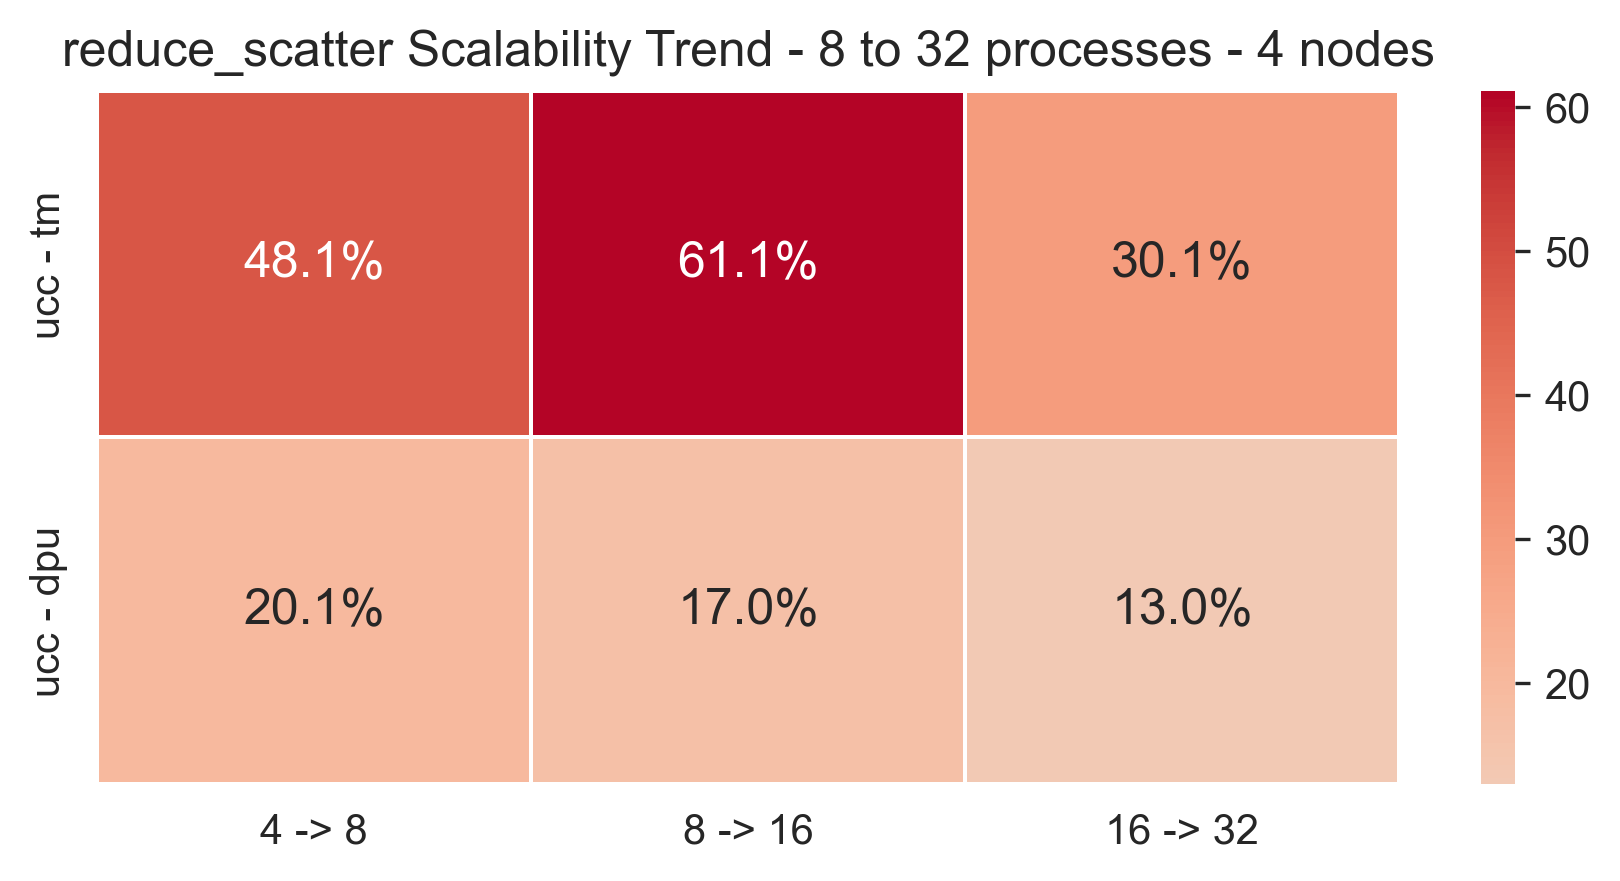

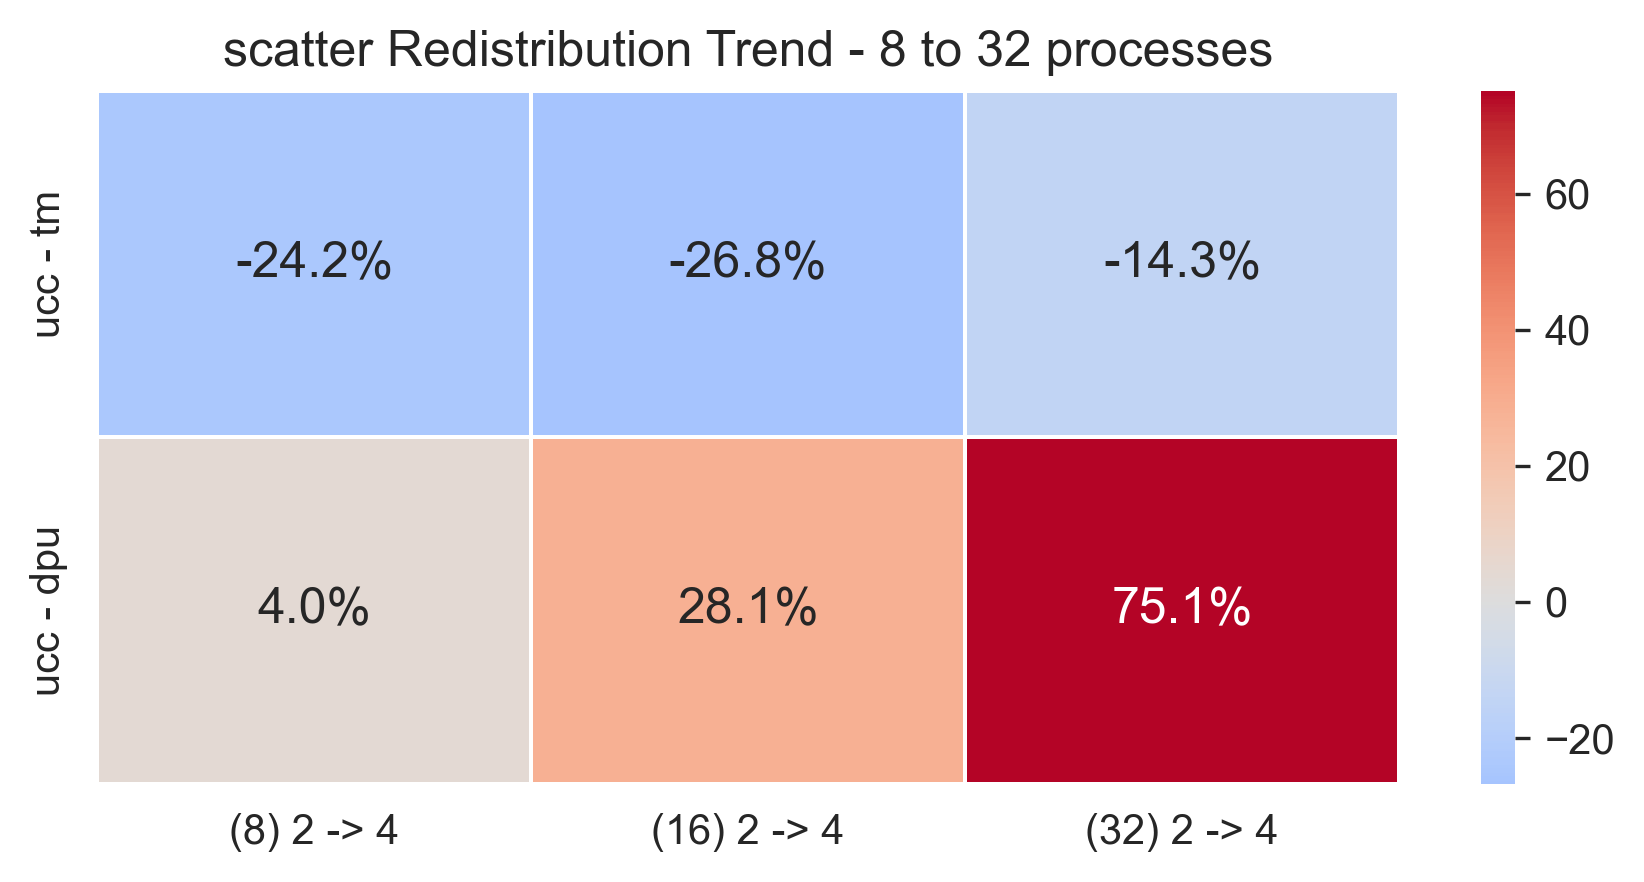

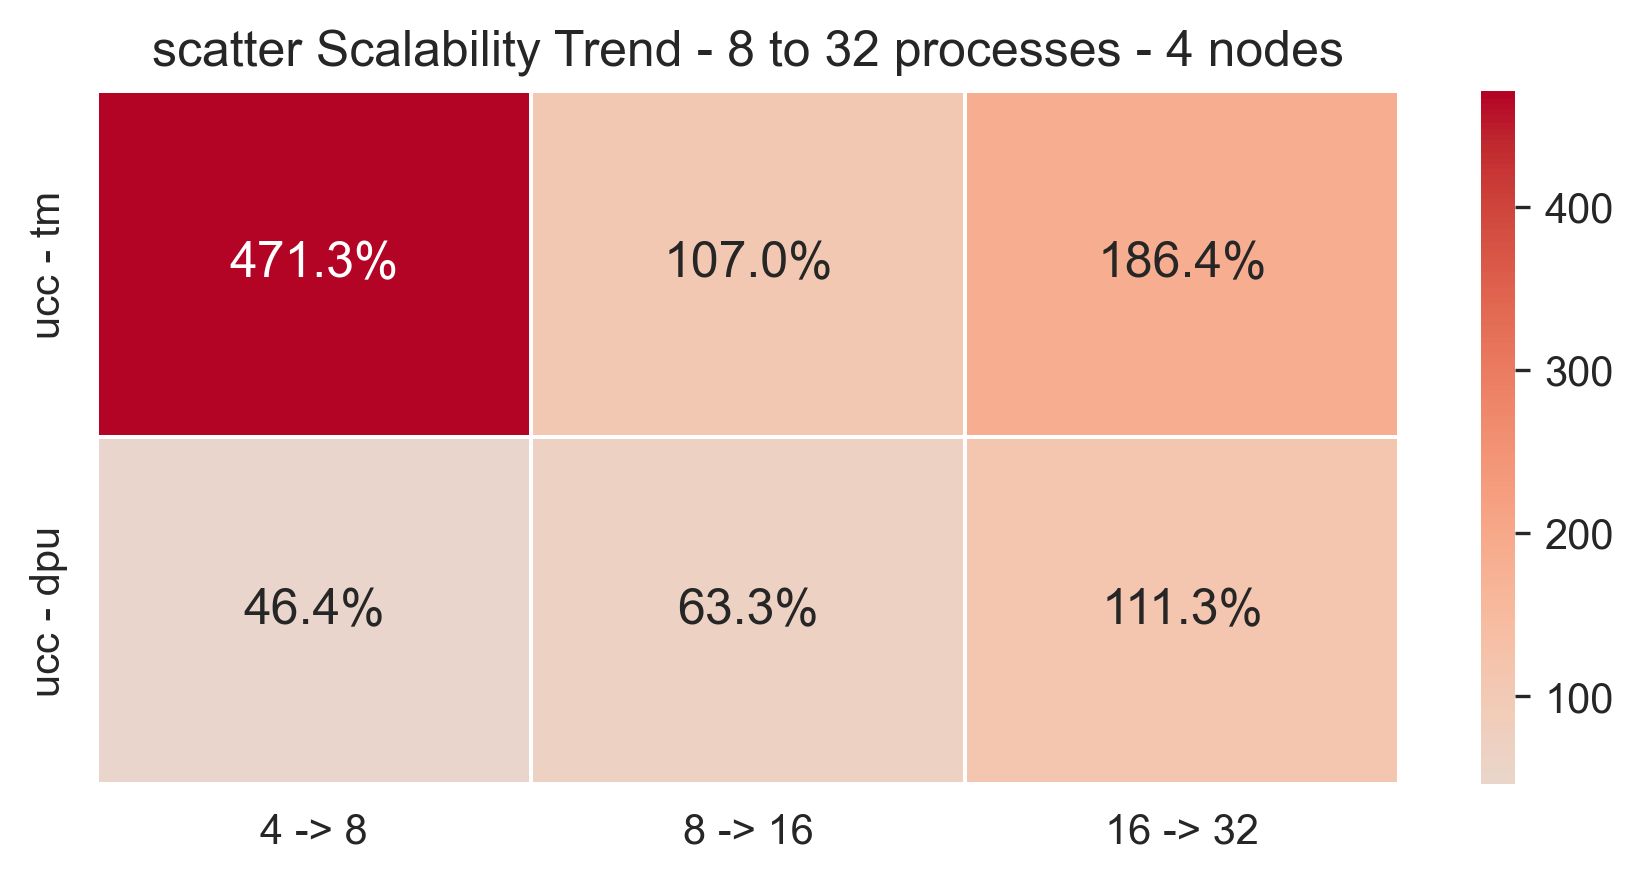

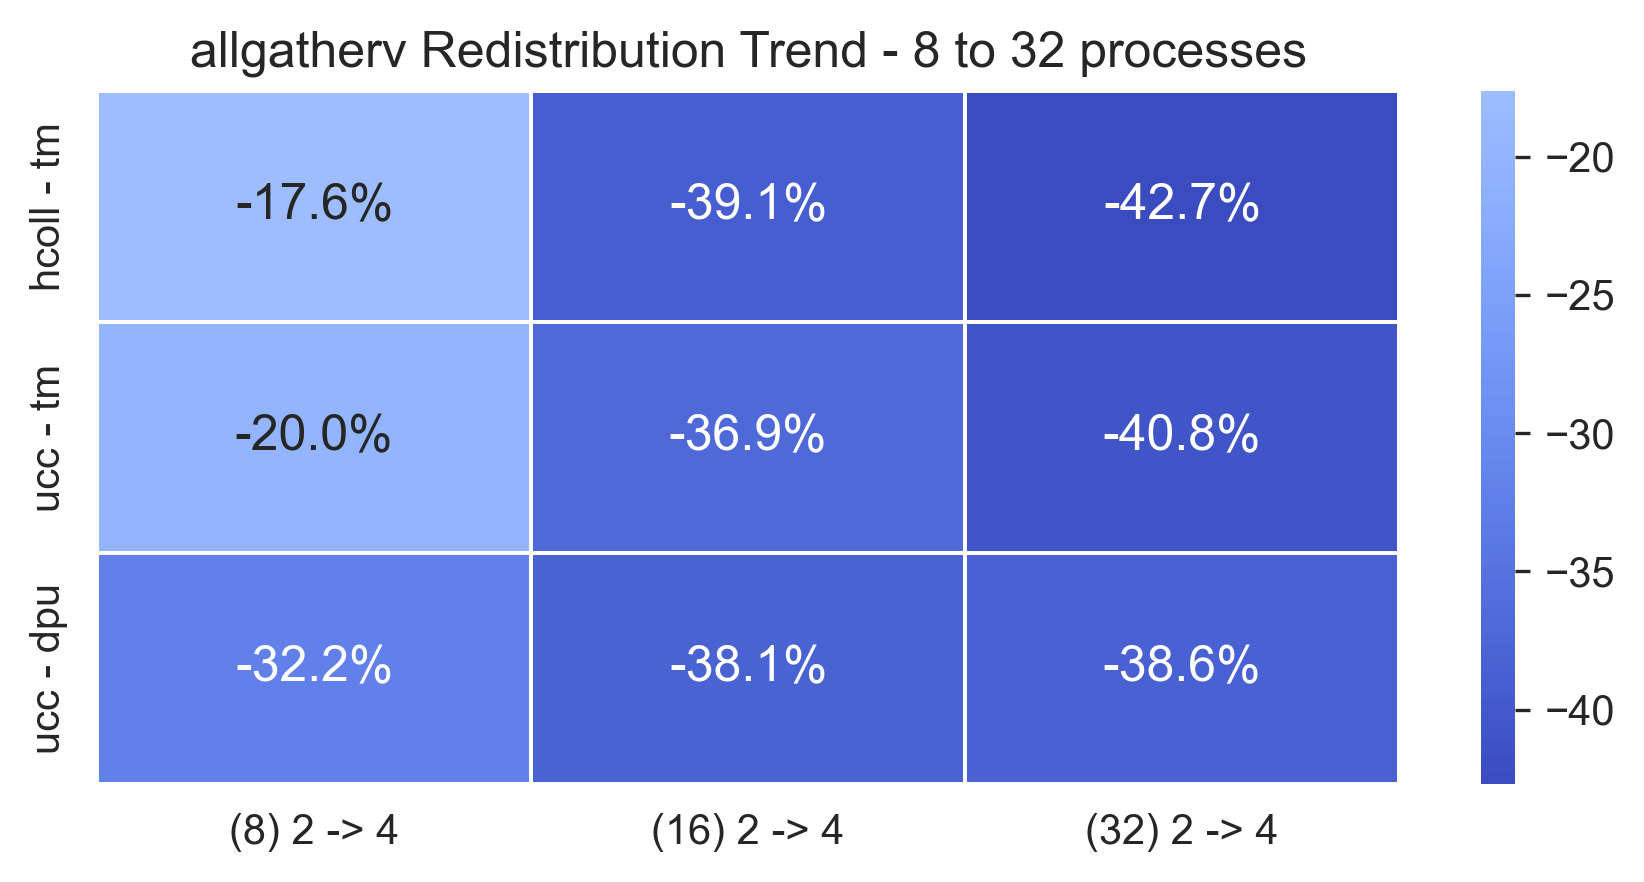

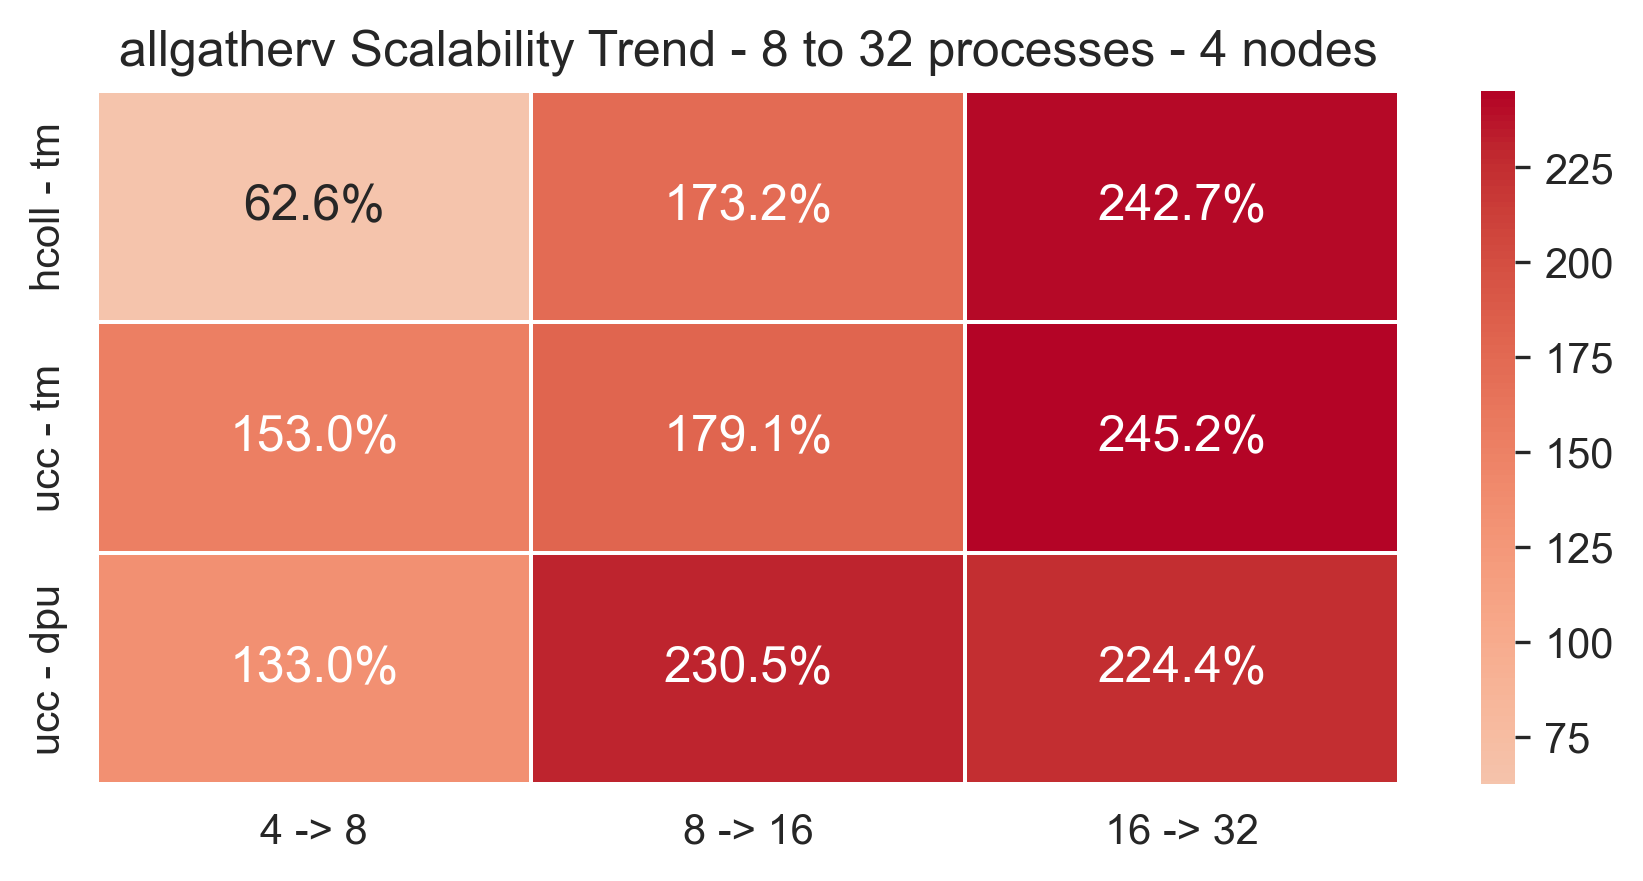

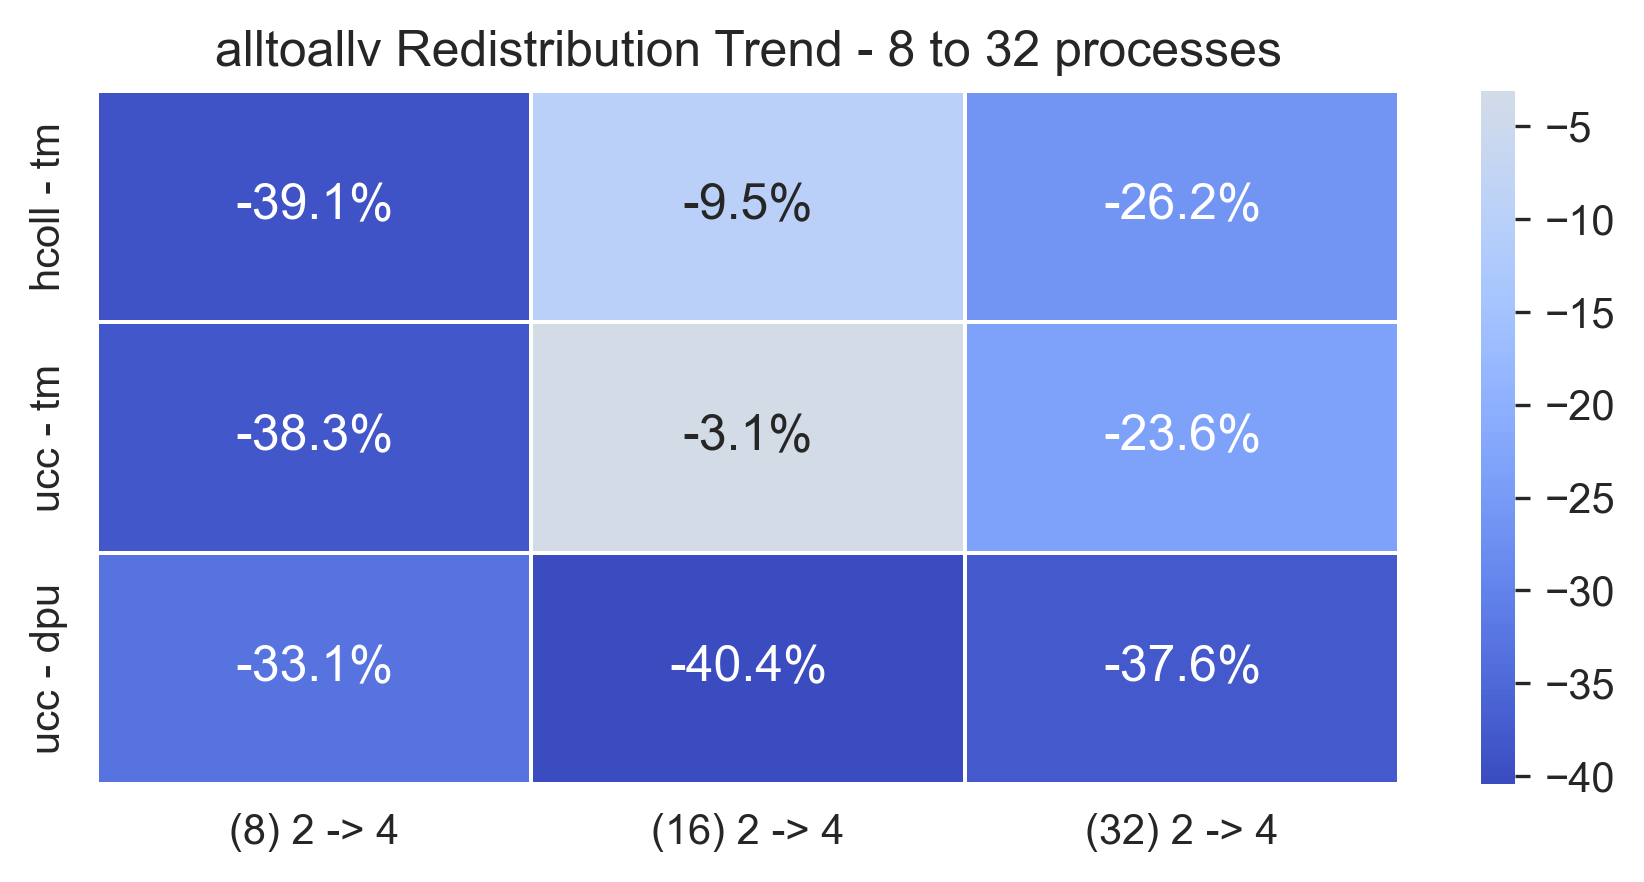

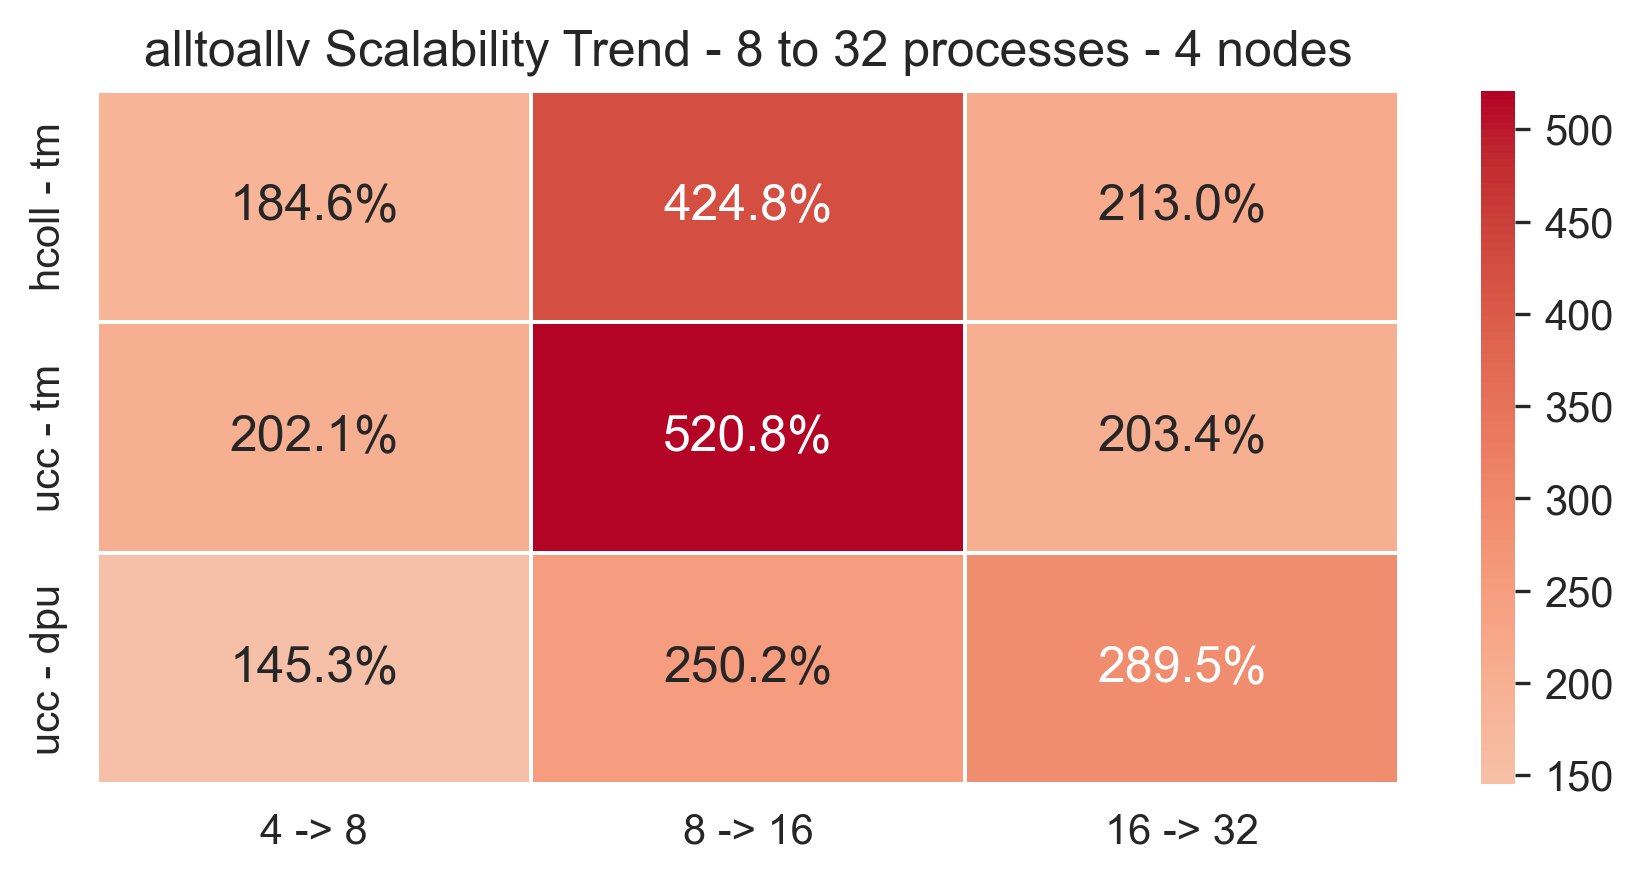

In [2]:
for col in collectives:
    df = compute_redistribution_trend(col, libs=['hcoll', 'ucc'], off_modes=['tm', 'dpu'], nodes= [2, 4], nprocs=[8, 16, 32]) * 100
    plot_heatmap(df, f"{col} Redistribution Trend - 8 to 32 processes")

    df = compute_scalability_trend(col, libs=['hcoll', 'ucc'], off_modes=['tm', 'dpu'], nodes=4, nprocs=[4, 8, 16, 32]) * 100
    plot_heatmap(df, f"{col} Scalability Trend - 8 to 32 processes - 4 nodes")
